# Ruina gracza
Proszę wykonać poprzednie zadania 1, 2, 3, 6 nie dla dwu graczy, ale dla kilku, np. 5, dla kilku różnych wartości $p_i$ (będzie wymagane ustalenie więcej niż jednego prawdopodobieństwa) przy sugerowanych kapitałach początkowych $a_i$ = 20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3

In [2]:
def single_game(players_fortune, players_probs):   
    if len(players_fortune) != len(players_probs):
        print("Players number not equal probs number")
        return
    
    duration = 0
    
    while np.sum([x > 0 for x in players_fortune]) > 1:
        duration += 1
        
        random = np.random.uniform(0, 1)
        section = 0

        for i, p in enumerate(players_probs):
            if players_fortune[i] == 0:
                continue
                
            section += p
            if random <= section:
                losers_prob = 0
                
                for fortune_index in range(len(players_fortune)):
                    if i != fortune_index and players_fortune[fortune_index] != 0:
                        players_fortune[fortune_index] -= 1
                        players_fortune[i] += 1
                        
                        if players_fortune[fortune_index] == 0:
                            losers_prob += players_probs[fortune_index]
                            players_probs[fortune_index] = 0
                    
                if losers_prob > 0:
                    new_prob = losers_prob / np.sum([x > 0 for x in players_probs])
                    for prob_index in range(len(players_probs)):
                        if players_probs[prob_index] != 0:
                            players_probs[prob_index] += new_prob
                break
                                    
    return duration

In [3]:
def simulation(game_num, players_fortune, players_probs):
    durations = []
    for _ in range(game_num):
        durations.append(single_game(players_fortune.copy(), players_probs.copy()))
        
    return durations

In [4]:
def draw_histogram(probs):
    game_num = 1000
    players_fortune = [20, 20, 20, 20, 20]
    
    durations = simulation(game_num, players_fortune, probs)
    mean = np.mean(durations)
    std = np.std(durations)
    print(f"Średnia: [{mean}], odchylenie standardowe: [{std}]")
    
    bin_width = (3.49 * std) / (np.cbrt(game_num))
    bins_num = int((np.max(durations) - np.min(durations)) / bin_width)
    
    plt.figure(figsize=(10,6))
    plt.hist(durations, bins=bins_num, weights=np.ones(len(durations))/len(durations))

    plt.title(f'Histogram for game duration')
    plt.xlabel('Game duration L')
    plt.ylabel('P(L)')
    plt.show()

Średnia: [2533.436], odchylenie standardowe: [1919.9600157044938]


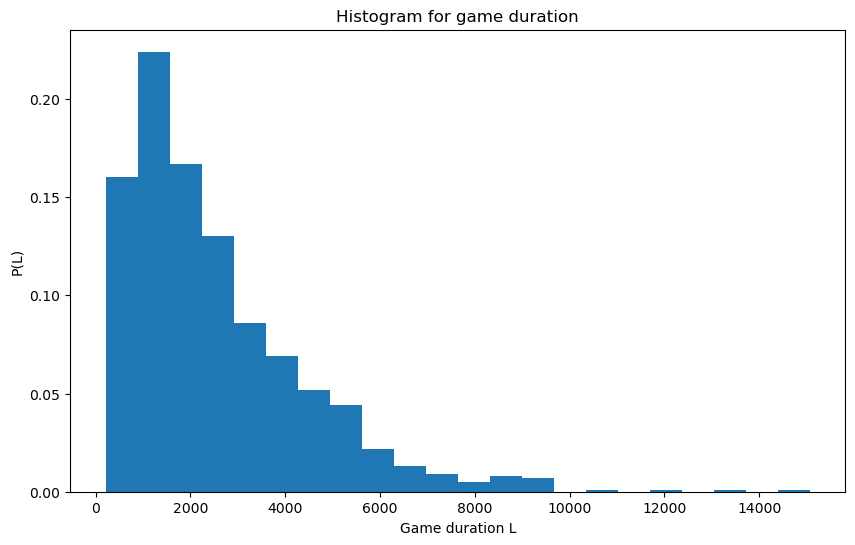

In [5]:
draw_histogram([0.2, 0.2, 0.2, 0.2, 0.2])

Średnia: [61.199], odchylenie standardowe: [16.502890625584357]


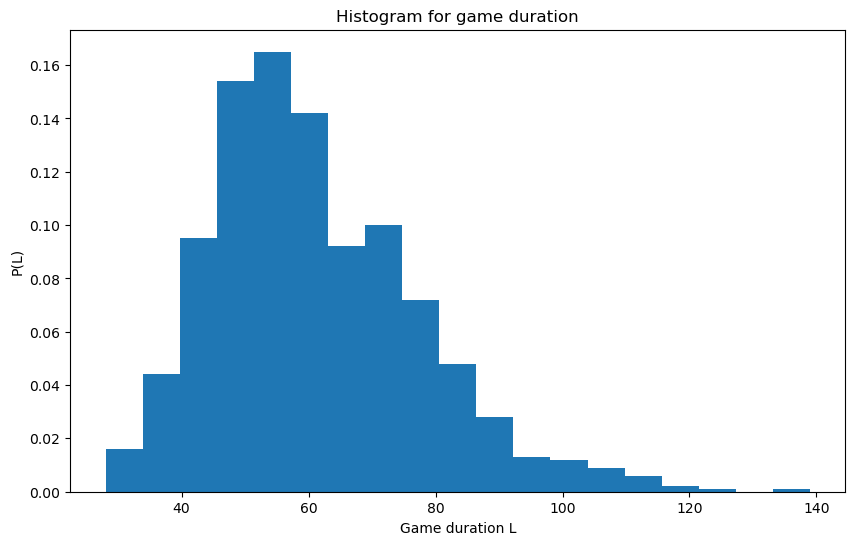

In [6]:
draw_histogram([0.6, 0.1, 0.1, 0.1, 0.1])

Średnia: [2660.224], odchylenie standardowe: [2100.789488221987]


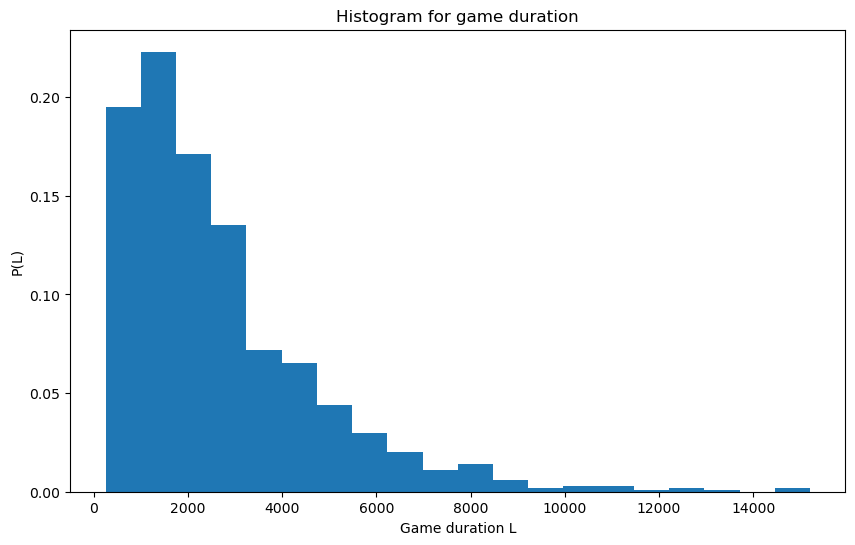

In [7]:
draw_histogram([0.04, 0.24, 0.24, 0.24, 0.24])